In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [16]:
!pip install xgboost

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [10]:
df1=df.drop('class',axis=1)
x=pd.get_dummies(df1,drop_first=True)

In [22]:
y=pd.get_dummies(df['class'],drop_first=True)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)

train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,train_pred))
print('test accuracy:',accuracy_score(y_test,test_pred))

from sklearn.model_selection import cross_val_score
print(cross_val_score(model,x,y,cv=5).mean())

train accuracy: 1.0
test accuracy: 1.0
0.9335172413793102


In [27]:
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier()
param_grid={'n_estimators':[1,5,20,50,60,70,100],'max_depth':[2,3,4,5],'gamma':[0.2,0.5,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'gamma': 0.2, 'max_depth': 2, 'n_estimators': 50}

In [28]:
grid.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06350858, 0.00413976, 0.02816896,
       0.08119334, 0.        , 0.27258107, 0.00856271, 0.        ,
       0.        , 0.        , 0.00581785, 0.0638718 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33434275, 0.        , 0.        ,
       0.02476574, 0.        , 0.        , 0.        , 0.        ,
       0.02806285, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00352524, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03344274, 0.00665644, 0.        , 0.        , 0.     

In [31]:
feats=pd.DataFrame(index=x.columns,data=grid.best_estimator_.feature_importances_,columns=['importance'])

important_features=feats[feats['importance']>0.01]
important_features

,importance
bruises_t,0.063509
odor_f,0.028169
odor_l,0.081193
odor_n,0.272581
gill-size_n,0.063872
stalk-root_c,0.334343
stalk-surface-above-ring_k,0.024766
stalk-surface-below-ring_y,0.028063
ring-number_o,0.033443
spore-print-color_r,0.011885


In [32]:
important_features_list=feats[feats['importance']>0.01].index.to_list()
important_features_list

['bruises_t',
 'odor_f',
 'odor_l',
 'odor_n',
 'gill-size_n',
 'stalk-root_c',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_y',
 'ring-number_o',
 'spore-print-color_r',
 'population_v']

In [33]:
x=x[important_features_list]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=XGBClassifier(n_estimators=50,max_depth=2,gamma=0.2)
model.fit(x_train,y_train)

train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

print('train accuracy:',accuracy_score(y_train,train_pred))
print('test accuracy:',accuracy_score(y_test,test_pred))

print(cross_val_score(model,x,y,cv=5).mean())

train accuracy: 0.9935374673026619
test accuracy: 0.9913846153846154
0.9743884804850322


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_pred)

array([[830,  13],
       [  1, 781]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       843
           1       0.98      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



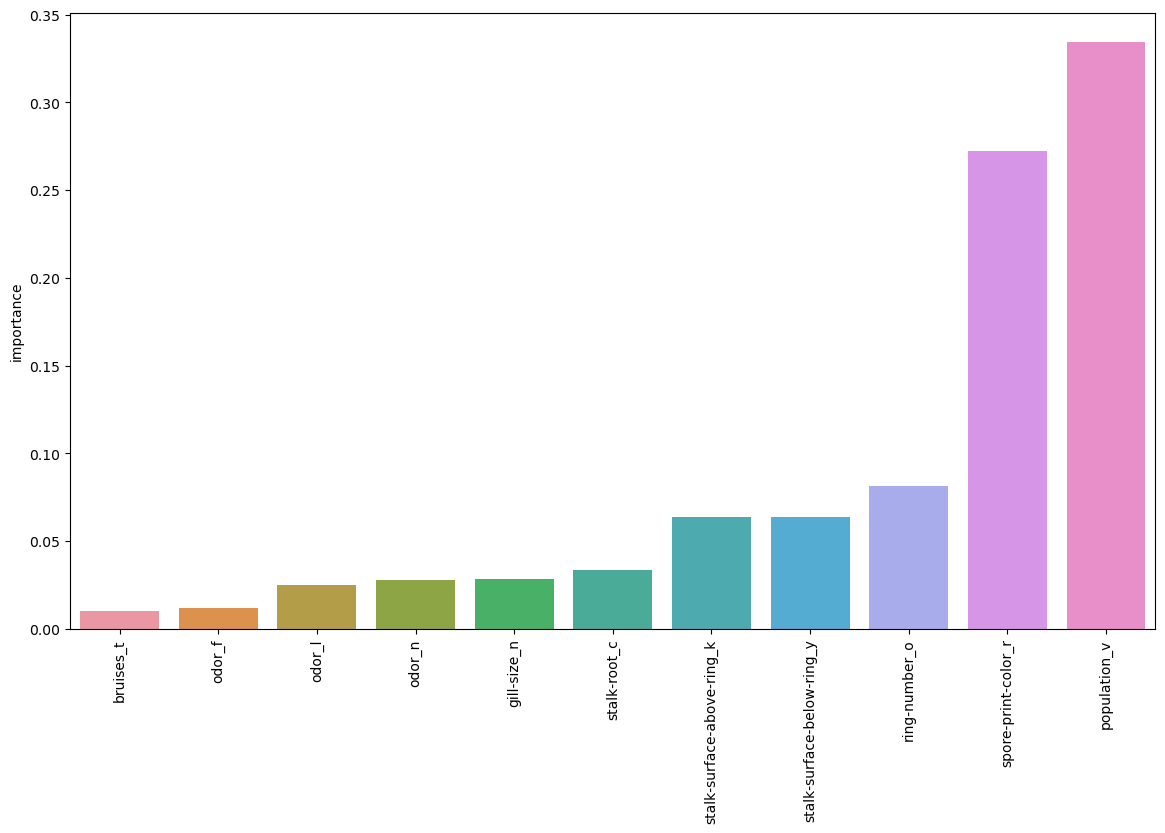

In [37]:
plt.figure(figsize=(14,8),dpi=100)

sns.barplot(data=important_features.sort_values('importance'),x=important_features.index,y='importance')
plt.xticks(rotation=90)
plt.show()